In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
df = pd.read_csv('C:\\Users\\frank\\OneDrive\\Desktop\\Kaggle\\data\\AirPassengers.csv')

In [3]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df.columns = ['Date', 'Passenger Numbers']

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               144 non-null    datetime64[ns]
 1   Passenger Numbers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


<AxesSubplot:xlabel='Date', ylabel='Passenger Numbers'>

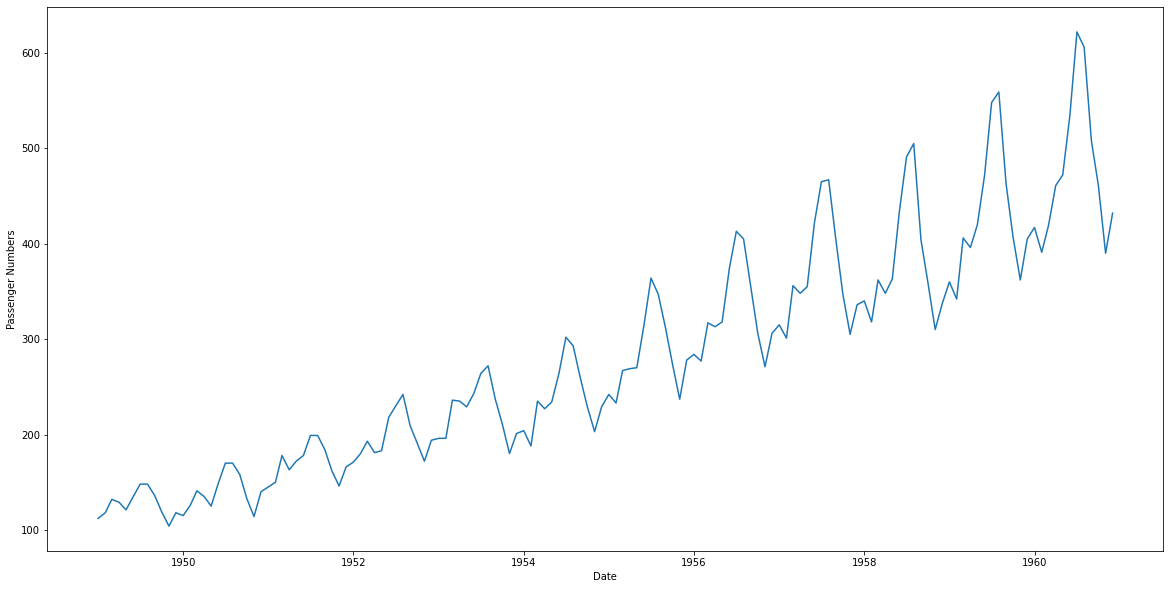

In [7]:
plt.figure(figsize = (20, 10))

sns.lineplot(x = 'Date', y = 'Passenger Numbers', data = df)

# Patterns in a Time Series

- Any time series visualization may consist of the following components: Base Level + Trend + Seasonality + Error.

## Trend
- A trend is observed when there is an increasing or decreasing slope observed in the time series.

## Seasonality
- A seasonality is observed when there is a distinct repeated pattern observed between regular intervals due to seasonal factors. It could be because of the month of the year, the day of the month, weekdays or even time of the day.

However, It is not mandatory that all time series must have a trend and/or seasonality. A time series may not have a distinct trend but have a seasonality and vice-versa.

## Cyclic behaviour
- Another important thing to consider is the cyclic behaviour. It happens when the rise and fall pattern in the series does not happen in fixed calendar-based intervals. We should not confuse 'cyclic' effect with 'seasonal' effect.
- If the patterns are not of fixed calendar based frequencies, then it is cyclic. Because, unlike the seasonality, cyclic effects are typically influenced by the business and other socio-economic factors.

## Additive and Multiplicative Time Series 
Table of Contents

- We may have different combinations of trends and seasonality. Depending on the nature of the trends and seasonality, a time series can be modeled as an additive or multiplicative time series. Each observation in the series can be expressed as either a sum or a product of the components.

## Additive time series:
Value = Base Level + Trend + Seasonality + Error

## Multiplicative Time Series:
Value = Base Level x Trend x Seasonality x Error

# Decomposition of a Time Series

- Decomposition of a time series can be performed by considering the series as an additive or multiplicative combination of the base level, trend, seasonal index and the residual term.
- The seasonal_decompose in statsmodels implements this conveniently.

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

In [9]:
# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(df['Passenger Numbers'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(df['Passenger Numbers'], model='additive', period=30)

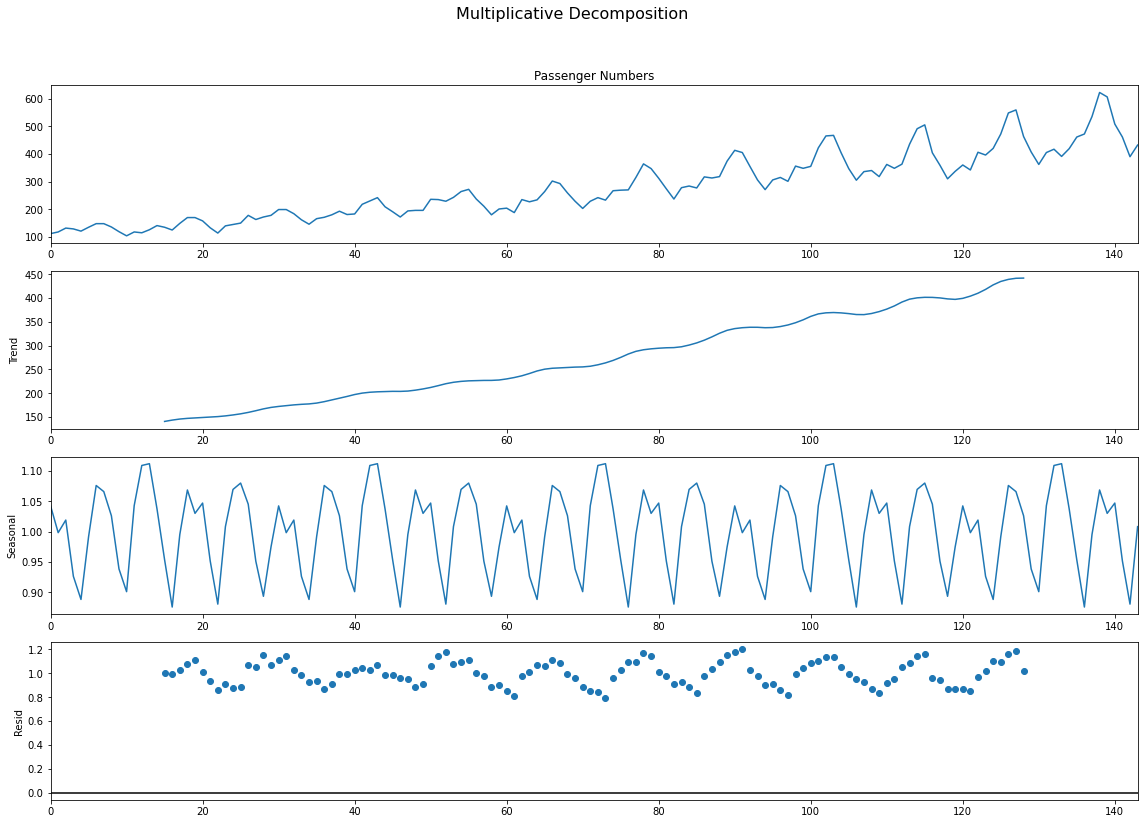

In [10]:
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

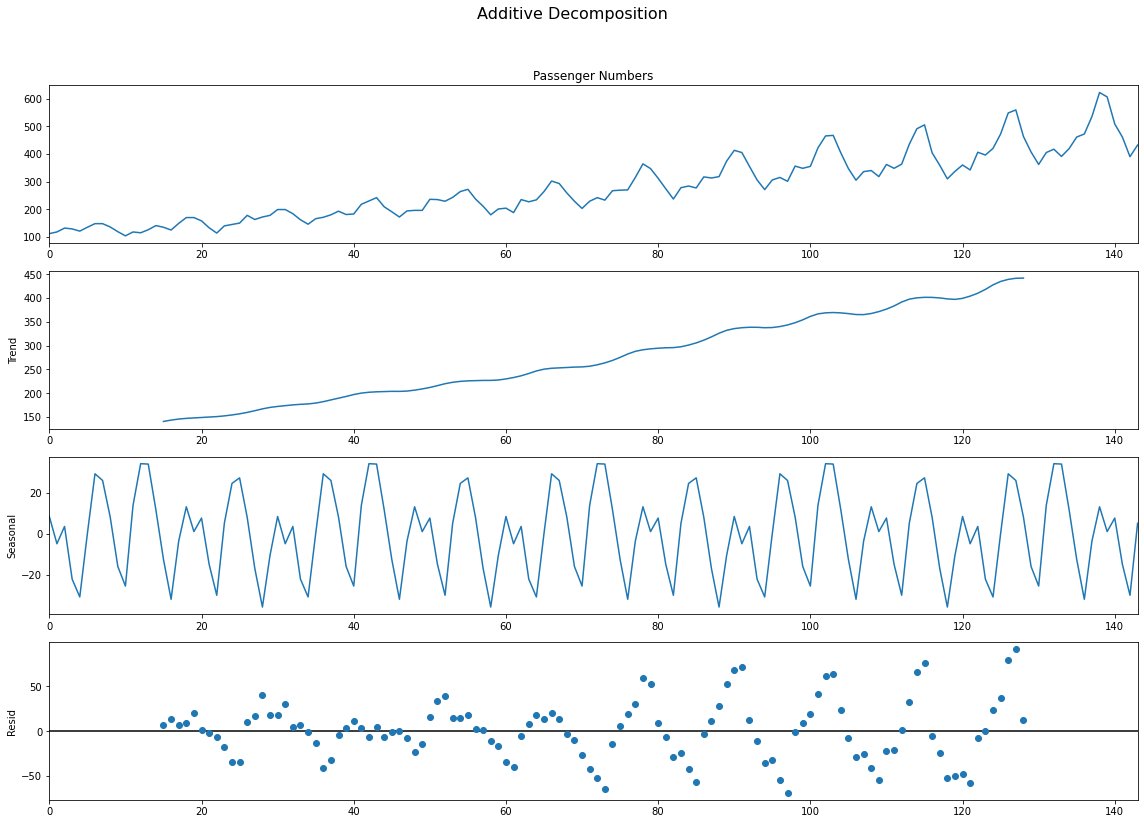

In [11]:
additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

- If we look at the residuals of the additive decomposition closely, it has some pattern left over (residuals shoing cone shape which is sign of heteroscedasticity).

- The multiplicative decomposition, looks quite random which is good. So ideally, multiplicative decomposition should be preferred for this particular series.

# Reasons to convert a non-stationary series into stationary one before forecasting

There are reasons why we want to convert a non-stationary series into a stationary one. These are given below:

- Forecasting a stationary series is relatively easy and the forecasts are more reliable.
- An important reason is, autoregressive forecasting models are essentially linear regression models that utilize the lag(s) of the series itself as predictors.
- We know that linear regression works best if the predictors (X variables) are not correlated against each other. So, stationarizing the series solves this problem since it removes any persistent autocorrelation, thereby making the predictors(lags of the series) in the forecasting models nearly independent.

# Difference between white noise and a stationary series 

- Like a stationary series, the white noise is also not a function of time. So, its mean and variance does not change over time. But the difference is that, the white noise is completely random with a mean of 0. In white noise there is no pattern.

- Mathematically, a sequence of completely random numbers with mean zero is a white noise.

<AxesSubplot:title={'center':'Random White Noise'}>

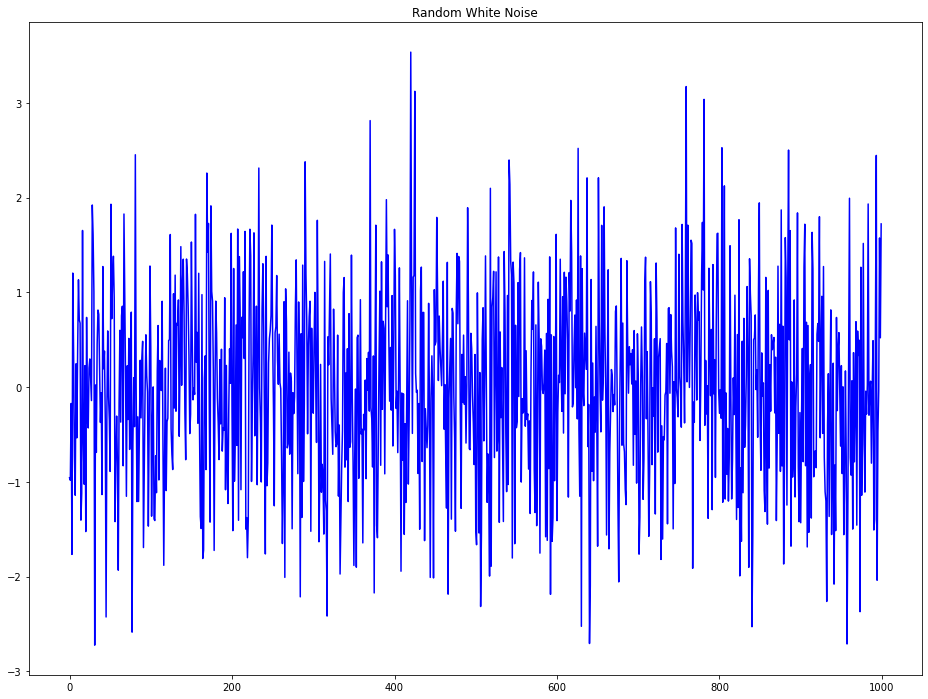

In [12]:
rand_numbers = np.random.randn(1000)
pd.Series(rand_numbers).plot(title='Random White Noise', color='b')

# Detrend a Time Series




Detrending a time series means to remove the trend component from the time series. There are multiple approaches of doing this as listed below:
- Subtract the line of best fit from the time series. The line of best fit may be obtained from a linear regression model with the time steps as the predictor. For more complex trends, we may want to use quadratic terms (x^2) in the model.
- We subtract the trend component obtained from time series decomposition.
- Subtract the mean.
- Apply a filter like Baxter-King filter(statsmodels.tsa.filters.bkfilter) or the Hodrick-Prescott Filter (statsmodels.tsa.filters.hpfilter) to remove the moving average trend lines or the cyclical components.

Now, we will implement the first two methods to detrend a time series.

## Subtract the line of best fit

Text(0.5, 1.0, 'Air Passengers detrended by subtracting the least squares fit')

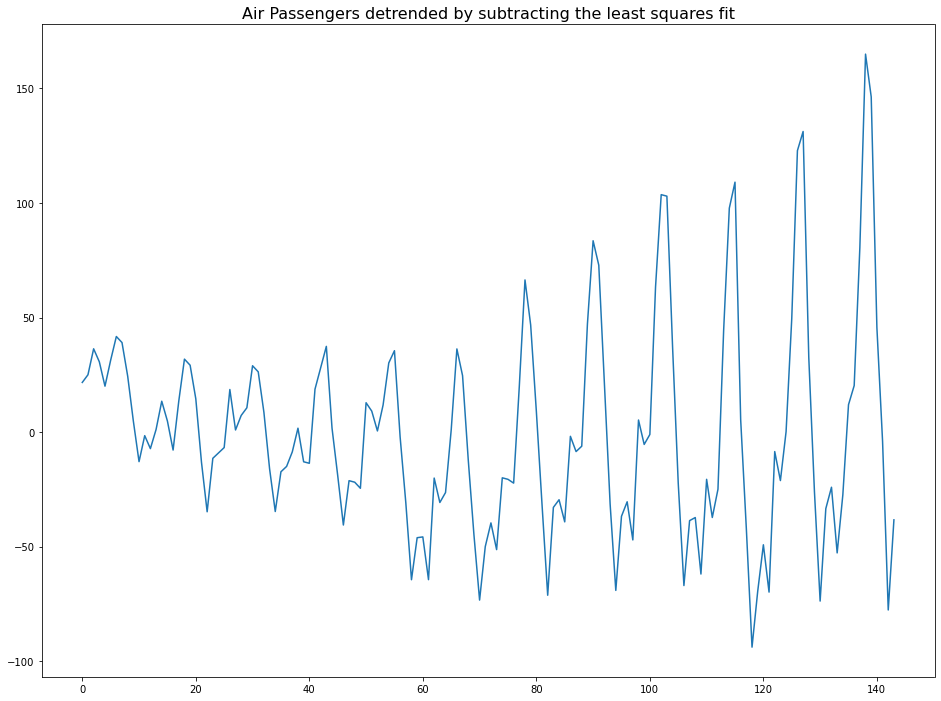

In [13]:
# Using scipy: Subtract the line of best fit
from scipy import signal
detrended = signal.detrend(df['Passenger Numbers'].values)
plt.plot(detrended)
plt.title('Air Passengers detrended by subtracting the least squares fit', fontsize=16)

## Substract the Trend

Text(0.5, 1.0, 'Air Passengers detrended by subtracting the trend component')

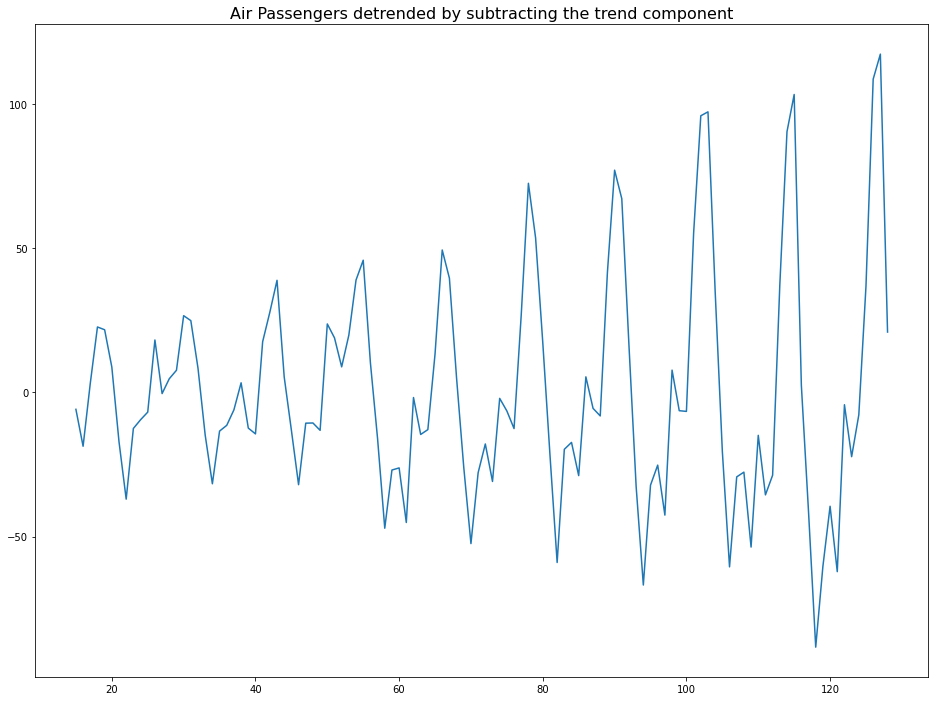

In [14]:
# Using statmodels: Subtracting the Trend Component
detrended = df['Passenger Numbers'].values - multiplicative_decomposition.trend
plt.plot(detrended)
plt.title('Air Passengers detrended by subtracting the trend component', fontsize=16)

# Deseasonalize a Time Series

There are multiple approaches to deseasonalize a time series. These approaches are listed below:

- Take a moving average with length as the seasonal window. This will smoothen in series in the process.
- Seasonal difference the series (subtract the value of previous season from the current value).
- Divide the series by the seasonal index obtained from STL decomposition.

If dividing by the seasonal index does not work well, we will take a log of the series and then do the deseasonalizing. We will later restore to the original scale by taking an exponential.

[]

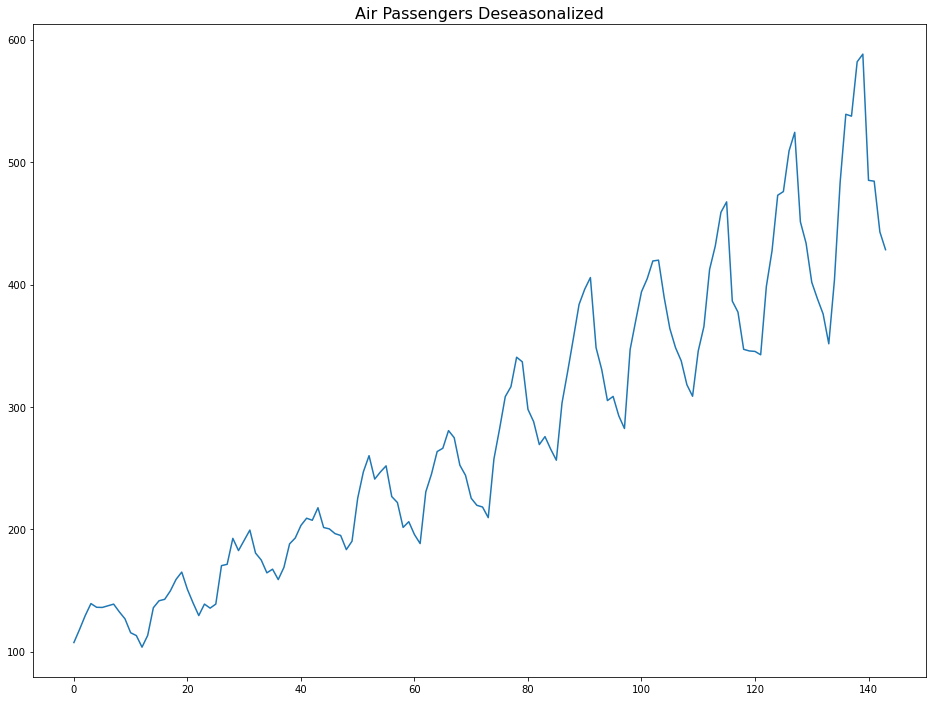

In [15]:
# Subtracting the Trend Component


# Time Series Decomposition
#result_mul = seasonal_decompose(df['Number of Passengers'], model='multiplicative', period=30)


# Deseasonalize
deseasonalized = df['Passenger Numbers'].values / multiplicative_decomposition.seasonal


# Plot
plt.plot(deseasonalized)
plt.title('Air Passengers Deseasonalized', fontsize=16)
plt.plot()

# How to test for seasonality of a time series?

The common way to test for seasonality of a time series is to plot the series and check for repeatable patterns in fixed time intervals. So, the types of seasonality is determined by the clock or the calendar.

- Hour of day
- Day of month
- Weekly
- Monthly
- Yearly

However, if we want a more definitive inspection of the seasonality, use the <b>Autocorrelation Function (ACF) </b> plot. There is a strong seasonal pattern, the ACF plot usually reveals definitive repeated spikes at the multiples of the seasonal window.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

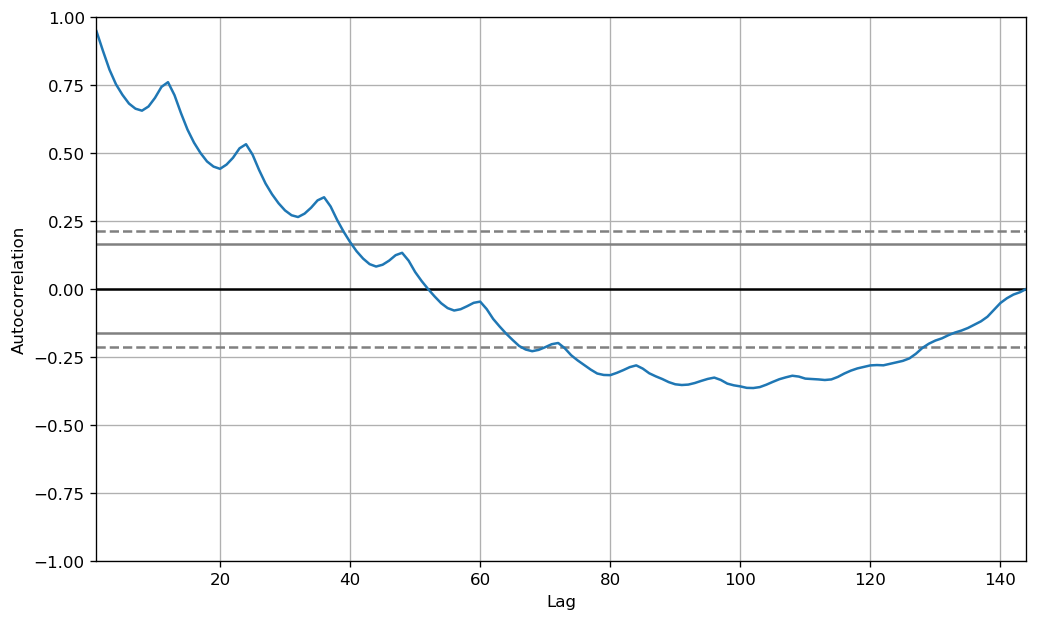

In [16]:
# Test for seasonality
from pandas.plotting import autocorrelation_plot

# Draw Plot
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':120})
autocorrelation_plot(df['Passenger Numbers'].tolist())

Alternately, if we want a statistical test, the CHTest can determine if seasonal differencing is required to stationarize the series.

# Autocorrelation and Partial Autocorrelation Functions

- Autocorrelation is simply the correlation of a series with its own lags. If a series is significantly autocorrelated, that means, the previous values of the series (lags) may be helpful in predicting the current value.
- Partial Autocorrelation also conveys similar information but it conveys the pure correlation of a series and its lag, excluding the correlation contributions from the intermediate lags.

C:\Users\frank\Anaconda3\envs\pytorch\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


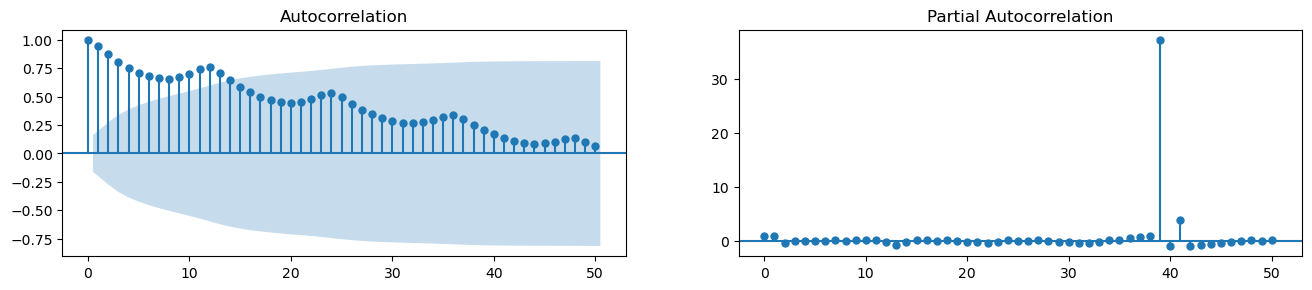

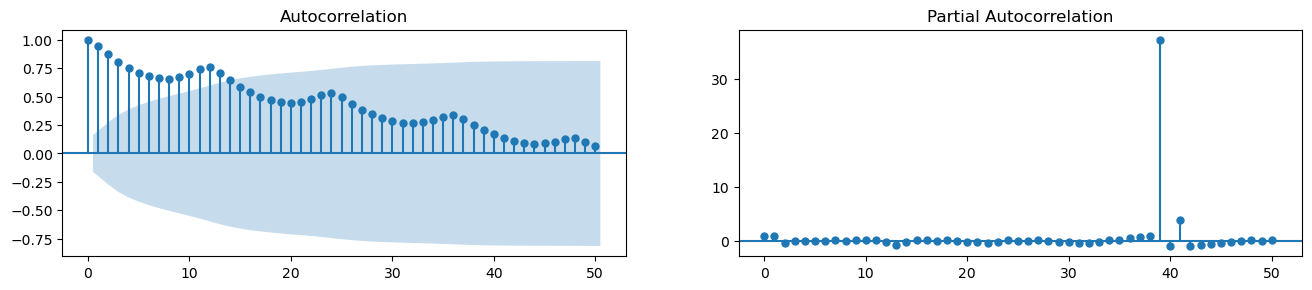

In [17]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df['Passenger Numbers'].tolist(), lags=50, ax=axes[0])
plot_pacf(df['Passenger Numbers'].tolist(), lags=50, ax=axes[1])

# Lag Plots

- A Lag plot is a scatter plot of a time series against a lag of itself. It is normally used to check for autocorrelation. If there is any pattern existing in the series, the series is autocorrelated. If there is no such pattern, the series is likely to be random white noise.

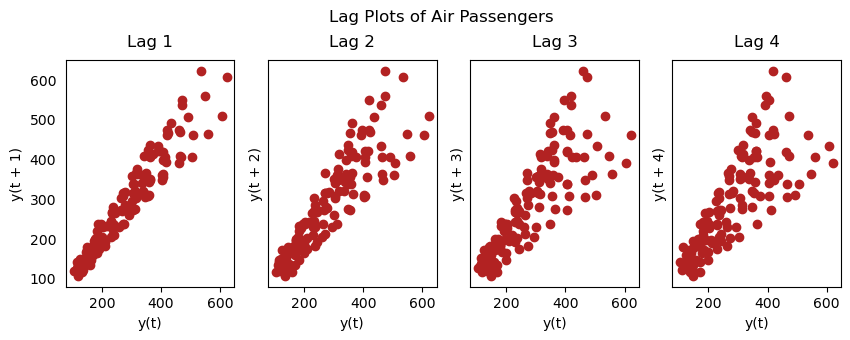

In [18]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(df['Passenger Numbers'], lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Air Passengers', y=1.05)    
plt.show()

# Granger Causality Test

- Granger causality test is used to determine if one time series will be useful to forecast another. It is based on the idea that if X causes Y, then the forecast of Y based on previous values of Y AND the previous values of X should outperform the forecast of Y based on previous values of Y alone.
- So, Granger causality test should not be used to test if a lag of Y causes Y. Instead, it is generally used on exogenous (not Y lag) variables only. It is implemented in the statsmodel package.
- It accepts a 2D array with 2 columns as the main argument. The values are in the first column and the predictor (X) is in the second column. The Null hypothesis is that the series in the second column, does not Granger cause the series in the first. If the P-Values are less than a significance level (0.05) then we reject the null hypothesis and conclude that the said lag of X is indeed useful. The second argument maxlag says till how many lags of Y should be included in the test.

In [19]:
from statsmodels.tsa.stattools import grangercausalitytests

df['Month'] = df['Date'].dt.month
grangercausalitytests(df[['Passenger Numbers', 'Month']], maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.4080  , p=0.0073  , df_denom=140, df_num=1
ssr based chi2 test:   chi2=7.5667  , p=0.0059  , df=1
likelihood ratio test: chi2=7.3733  , p=0.0066  , df=1
parameter F test:         F=7.4080  , p=0.0073  , df_denom=140, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.9761  , p=0.0082  , df_denom=137, df_num=2
ssr based chi2 test:   chi2=10.3154 , p=0.0058  , df=2
likelihood ratio test: chi2=9.9579  , p=0.0069  , df=2
parameter F test:         F=4.9761  , p=0.0082  , df_denom=137, df_num=2


{1: ({'ssr_ftest': (7.407967762077243, 0.007318844731632684, 140.0, 1),
   'ssr_chi2test': (7.5667099284074695, 0.005945621865036137, 1),
   'lrtest': (7.373310381387228, 0.00661989587473731, 1),
   'params_ftest': (7.407967762077304, 0.007318844731632488, 140.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (4.976083922906405, 0.008199795902675954, 137.0, 2),
   'ssr_chi2test': (10.315385650404519, 0.005754962083917613, 2),
   'lrtest': (9.957923125859452, 0.006881204546490603, 2),
   'params_ftest': (4.976083922906445, 0.008199795902675753, 137.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}